<a href="https://colab.research.google.com/github/SergeevaAI/Platforms_Data_Sciense/blob/main/04_1_HW_%D0%A1%D0%B5%D1%80%D0%B3%D0%B5%D0%B5%D0%B2%D0%B0_%D0%90%D0%BD%D0%B0%D1%81%D1%82%D0%B0%D1%81%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Задание к лекции 04-1: Линейная регрессия 1

Name: Сергеева Анастасия

Email: sergehewa02@mail.ru




## Упражнение: амфетамин и аппетит

Амфетамин – препарат, подавляющий аппетит. В исследовании этого эффекта фармаколог случайным образом распределил 24 крысы на три группы лечения, которым вводили инъекцию амфетамина в одной из двух дозировок (2,5 мг/кг или 5,0 мг/кг) или инъекцию физиологического раствора (0 мг). /кг). Он измерил количество пищи, потребляемой каждым животным (в г/кг) в течение 3-часового периода после инъекции. Результаты (граммы потребляемой пищи на кг массы тела) показаны ниже.


In [ ]:
# imports and setup

import scipy as sc
import numpy as np

import pandas as pd
import statsmodels.formula.api as sm
from sklearn import linear_model

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Experiment results:

food_consump_dose0 = [112.6, 102.1, 90.2, 81.5, 105.6, 93.0, 106.6, 108.3]
food_consump_dose2p5 = [73.3, 84.8, 67.3, 55.3, 80.7, 90.0, 75.5, 77.1]
food_consump_dose5 = [38.5, 81.3, 57.1, 62.3, 51.5, 48.3, 42.7, 57.9]

## Упражнение 4-1.1: Диаграмма рассеяния и линейная регрессия

**Упражнение:** Постройте диаграмму рассеяния, указав дозу в качестве переменной $x$ и потребление пищи в качестве переменной $y$. Затем запустите линейную регрессию данных, используя функцию `ols` из библиотеки `Python statsmodels`, чтобы связать переменные по

$$
\text{Потребление пищи} = \beta_0 + \beta_1 \text{Доза}.
$$

Какое получается линейное уравнение? Каково значение $R^2$? Считаете ли вы, что переменные имеют сильную линейную связь? Добавьте линию тренда к диаграмме рассеяния.

In [ ]:
# создаем массив со значением доз
doze=[0, 2.5, 5]

In [ ]:
food=[food_consump_dose0, food_consump_dose2p5, food_consump_dose5]
food

[[112.6, 102.1, 90.2, 81.5, 105.6, 93.0, 106.6, 108.3],
 [73.3, 84.8, 67.3, 55.3, 80.7, 90.0, 75.5, 77.1],
 [38.5, 81.3, 57.1, 62.3, 51.5, 48.3, 42.7, 57.9]]

Присваиваем к каждой дозе ее количество употребленной пищи

In [ ]:
# создание пустого списка dozeandfood
dozeandfood=[]
# обращение к циклу и range для получения индексов в doze (доз) и их дальнейшего сопоставления с пищей
for i in range(len(doze)):
  for n in food[i]:
    dozeandfood.append([doze[i], n])
dozeandfood

[[0, 112.6],
 [0, 102.1],
 [0, 90.2],
 [0, 81.5],
 [0, 105.6],
 [0, 93.0],
 [0, 106.6],
 [0, 108.3],
 [2.5, 73.3],
 [2.5, 84.8],
 [2.5, 67.3],
 [2.5, 55.3],
 [2.5, 80.7],
 [2.5, 90.0],
 [2.5, 75.5],
 [2.5, 77.1],
 [5, 38.5],
 [5, 81.3],
 [5, 57.1],
 [5, 62.3],
 [5, 51.5],
 [5, 48.3],
 [5, 42.7],
 [5, 57.9]]

Создание датафрейма

In [ ]:
# создадим датафрейм из данных для работы с библиотекой statsmodels
df=pd.DataFrame(dozeandfood, columns=['Доза', 'Количество_потребляемой_пищи'])
df

,Доза,Количество_потребляемой_пищи
0,0.0,112.6
1,0.0,102.1
2,0.0,90.2
3,0.0,81.5
4,0.0,105.6
5,0.0,93.0
6,0.0,106.6
7,0.0,108.3
8,2.5,73.3
9,2.5,84.8


Построить диаграмму рассеяния для поиска зависимостей количества пищи от дозы.

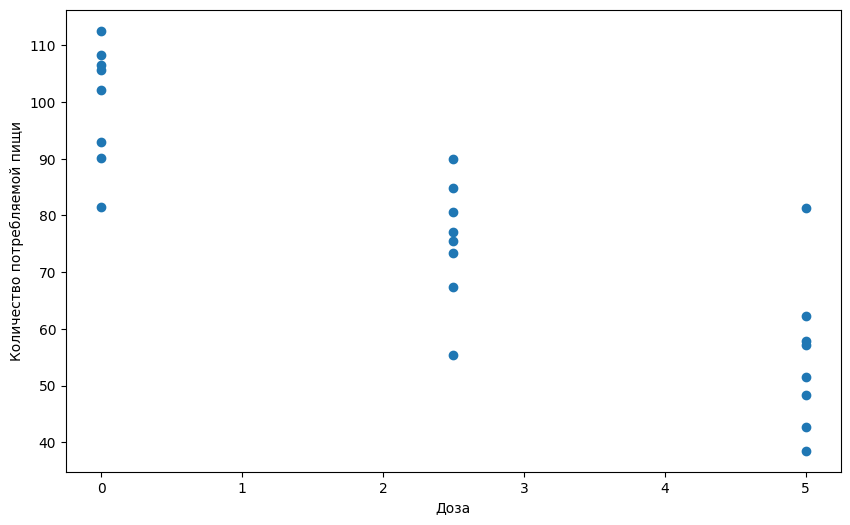

In [ ]:
plt.scatter(x=df['Доза'],y=df['Количество_потребляемой_пищи'])
plt.xlabel('Доза')
plt.ylabel('Количество потребляемой пищи')
plt.show()

Можно заметить, что, чем выше доза, тем меньше количество потребляемой пищи. Взаимосвязь между дозой и количеством потребляемой пищи существует.

Проведем описательную статистику без группировки на уровень дозы.

In [ ]:
df.describe()

,Доза,Количество_потребляемой_пищи
count,24.000000,24.000000
mean,2.500000,76.812500
std,2.085144,21.842685
min,0.000000,38.500000
25%,0.000000,57.700000
50%,2.500000,78.900000
75%,5.000000,90.900000
max,5.000000,112.600000


50% данных о потребляемой пище находится в диапазоне от 57.7 до 90. Минимальное потребление пищи 38.5, а максимальное 112.6.

Далее посмотрим статистику по группам.

In [ ]:
df.groupby('Доза')['Количество_потребляемой_пищи'].describe()

,count,mean,std,min,25%,50%,75%,max
Доза,,,,,,,,
0.0,8.0,99.9875,10.652087,81.5,92.3,103.85,107.025,112.6
2.5,8.0,75.5000,10.733526,55.3,71.8,76.30,81.725,90.0
5.0,8.0,54.9500,13.301235,38.5,46.9,54.30,59.000,81.3


Больше всего потряблемой пищи у нулевой концентрации, меньше всего у концентрации 5, что также говорит о зависимости потребляемой пищи от дозы.

Воспользоваться моделью линейной регрессии

$$
\text{Потребление пищи} = \beta_0 + \beta_1 \text{Доза}.
$$

In [ ]:
ad_df_ols = sm.ols(formula="Количество_потребляемой_пищи ~ Доза", data=df).fit()
ad_df_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Количество_потребляемой_пищи   R-squared:                       0.739
Model:                                      OLS   Adj. R-squared:                  0.728
Method:                           Least Squares   F-statistic:                     62.41
Date:                          Sun, 17 Mar 2024   Prob (F-statistic):           7.27e-08
Time:                                  11:00:18   Log-Likelihood:                -91.420
No. Observations:                            24   AIC:                             186.8
Df Residuals:                                22   BIC:                             189.2
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     99.3313      3.680     26.994      0.000      91.700     106.963
Доза          -9.0075      1.140     -7.900      0.000     -11.372      -6.643
==============================================================================
Omnibus:                        0.409   Durbin-Watson:                   2.109
Prob(Omnibus):                  0.815   Jarque-Bera (JB):                0.052
Skew:                           0.114   Prob(JB):                        0.974
Kurtosis:                       3.012   Cond. No.                         5.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Начало линии равно  β^0=99,331 . Это означает, что без дозы модель прогнозирует, что будет употреблено пищи 99,331.

Наклон линии  β^1=-9. Это означает, что модель предсказывает, что на каждую дополнительную дозу, будет употреблено на 9 единиц меньше пищи.  

В модели значение  R2=0,739, что неплохо. Модель объясняет  73,9%  изменчивости питания.

p  для F-статистики пренибрежимо мало, что указывает на значимость модели.

Prob(Omnibus) = 0.815 — показывает вероятность нормального распределения остатков (значение 1 указывает на совершенно нормальное распределение), значение почти близко к 1.

Построение диаграммы рассеяния с линией тренда.

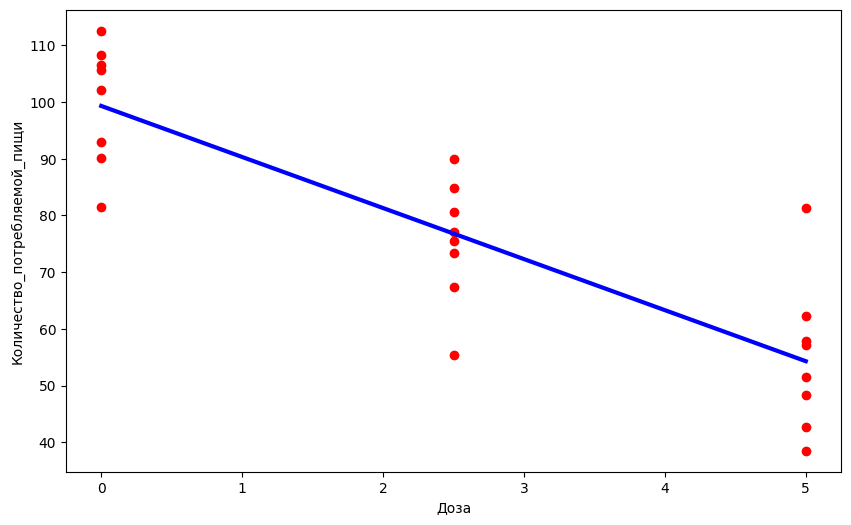

In [ ]:
plt.scatter(x=df['Доза'],y=df['Количество_потребляемой_пищи'],c='r',marker='o',label='TV')
plt.plot(df['Доза'],ad_df_ols.predict(),color='blue',linewidth=3)

plt.xlabel('Доза')
plt.ylabel('Количество_потребляемой_пищи')
plt.show()

## Задание 4-1.2: Невязка(остатки) значения

Регрессия в Упражнении 4-1.1 на самом деле валидна, даже несмотря на то, что предиктор $x$ имеет только 3 различных значения; для каждого фиксированного значения $x$ исследователь собрал случайную выборку значений $y$.

Однако одно предположение, которое делается с помощью простой линейной регрессии, заключается в том, что остатки имеют примерно нормальное распределение.

**Упражнение:** Вычислите остатки для приведенной выше регрессии и постройте нормальный вероятностный график остатков. Как вы думаете, они нормально распределены?



Рассчитываем остатки с помощью метода .resid.

In [ ]:
residuals = ad_df_ols.resid
residuals

0     13.26875
1      2.76875
2     -9.13125
3    -17.83125
4      6.26875
5     -6.33125
6      7.26875
7      8.96875
8     -3.51250
9      7.98750
10    -9.51250
11   -21.51250
12     3.88750
13    13.18750
14    -1.31250
15     0.28750
16   -15.79375
17    27.00625
18     2.80625
19     8.00625
20    -2.79375
21    -5.99375
22   -11.59375
23     3.60625
dtype: float64

Рассчитываем сумму квадратов остатков.

In [ ]:
ad_df_ols.ssr

2859.860625

SSR, само по себе трудно интерпретировать. Проще интерпретируется значение **$R^2$**, что я и сделала выше.

Построить график остатков с помощью seaborn.residplot.

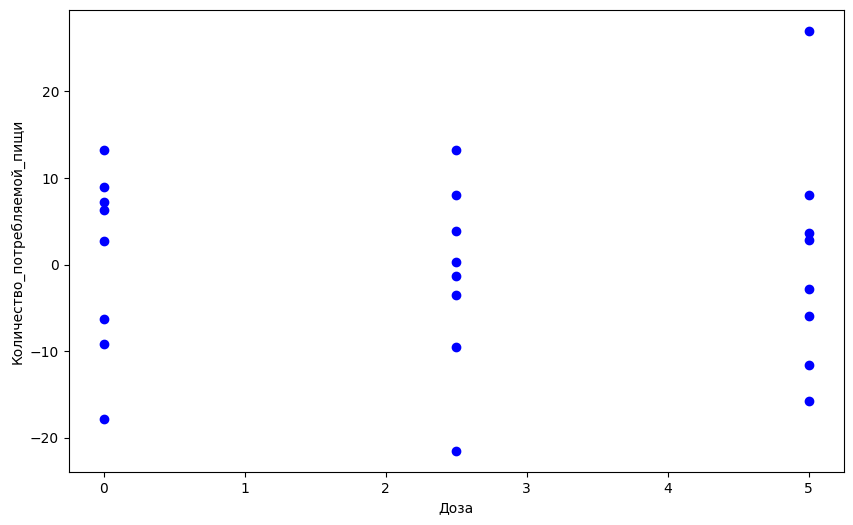

In [ ]:
plt.scatter(x=df['Доза'],y=residuals,c='b',marker='o')

plt.xlabel('Доза')
plt.ylabel('Количество_потребляемой_пищи')
plt.show()

Остаток в линейной регрессии — это разница между фактическим значением точки данных и прогнозируемым значением из линии наилучшего соответствия. Отсатки небольшие, закономерности у остатков не наблюдается, значит, модель хорошая.